<a href="https://colab.research.google.com/github/MANOJ9590/SPA/blob/main/DataTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
Death_URL="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
Confirmed_cases_URL= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
Recovered_URL="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"



In [3]:
confirmed_cases = pd.read_csv(Confirmed_cases_URL)
deaths = pd.read_csv(Death_URL)
recovered = pd.read_csv(Recovered_URL)


In [4]:
recovered[recovered['Country/Region'] == 'Germany'].transpose()



,120
Province/State,NaN
Country/Region,Germany
Lat,51.165691
Long,10.451526
1/22/20,0
...,...
6/19/22,0
6/20/22,0
6/21/22,0
6/22/22,0


In [5]:
confirmed_PK = confirmed_cases[confirmed_cases['Country/Region'] == 'India']
deaths_PK = deaths[deaths['Country/Region'] == 'India']
recovered_PK = recovered[recovered['Country/Region'] == 'India']

In [6]:
dates = np.array(confirmed_PK.iloc[0,38:].index)
dates = [datetime.strptime(date, '%m/%d/%y').date() for date in dates] 
dates = [x.strftime('%d/%m/%y') for x in dates]

In [7]:
confirmed_pk = np.array(confirmed_PK.iloc[0,38:])
deaths_pk = np.array(deaths_PK.iloc[0,38:])
recovered_pk = np.array(recovered_PK.iloc[0,38:])

In [8]:
conf_death_recov = np.concatenate((confirmed_pk.reshape(-1,1), deaths_pk.reshape(-1,1), recovered_pk.reshape(-1,1)), axis = 1)


In [9]:
print('The data taken from 25 feb 2020 because 1st two case was confirmed at that day. All the previous data is emitted.\n')

df =pd.DataFrame(np.append(np.array(dates).reshape(-1,1), conf_death_recov, axis = 1), columns = ['Date', 'Confirmed Cases', 'Deaths', 'Recoveries'])
pd.DataFrame(np.append(np.array(dates).reshape(-1,1), conf_death_recov, axis = 1), columns = ['Date', 'Confirmed Cases', 'Deaths', 'Recoveries'])




The data taken from 25 feb 2020 because 1st two case was confirmed at that day. All the previous data is emitted.



,Date,Confirmed Cases,Deaths,Recoveries
0,25/02/20,3,0,3
1,26/02/20,3,0,3
2,27/02/20,3,0,3
3,28/02/20,3,0,3
4,29/02/20,3,0,3
...,...,...,...,...
845,19/06/22,43309473,524873,0
846,20/06/22,43319396,524890,0
847,21/06/22,43331645,524903,0
848,22/06/22,43344958,524941,0


In [10]:
#from google.colab import files
#df.to_csv('Germany.csv') 
#files.download('Germany.csv')


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import figure

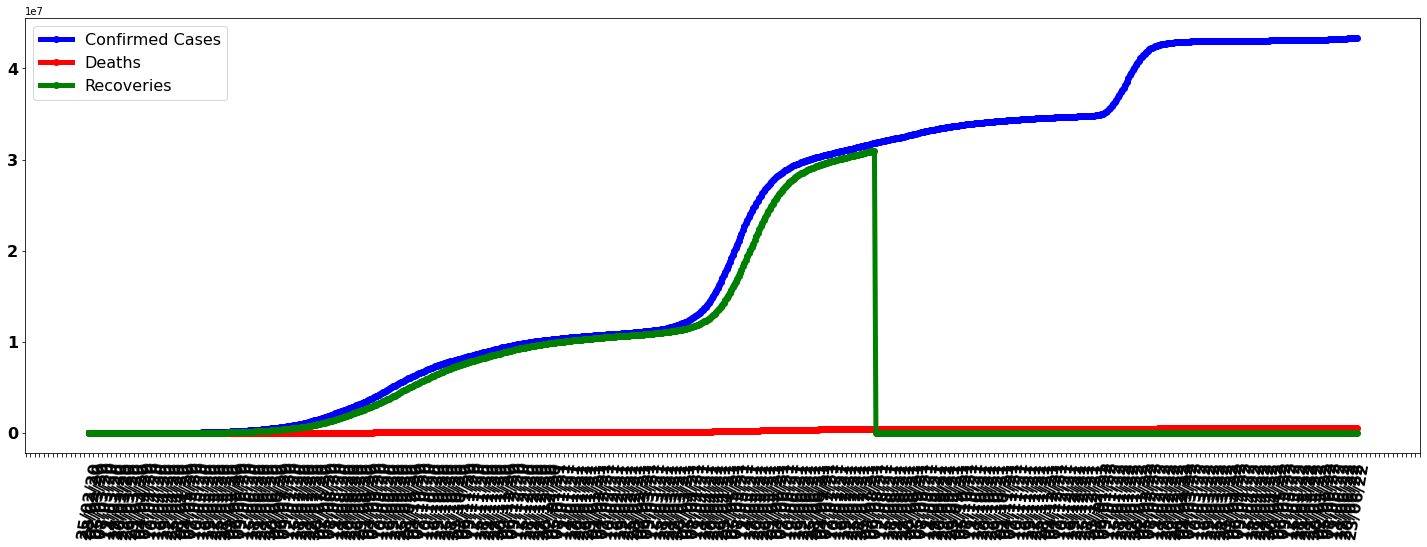

In [11]:
plt.figure(figsize=(25,8))
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.plot(dates,confirmed_pk, 'bo-', linewidth = 5)
plt.plot(dates,deaths_pk, 'ro-', linewidth = 5)
plt.plot(dates,recovered_pk, 'go-', linewidth = 5)
plt.legend(['Confirmed Cases', 'Deaths', 'Recoveries'], prop = {'size': 16})

plt.xticks(rotation=80, weight = 'bold');
plt.yticks(weight = 'bold');
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures


In [13]:
poly_reg = PolynomialFeatures(degree = 6)


In [14]:
input_data_simple = np.arange(0,len(confirmed_pk)) + 1


In [15]:
input_data = poly_reg.fit_transform(input_data_simple.reshape(-1,1))


In [17]:
inputData_dates = pd.Series(dates, index = input_data_simple)


In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scx = StandardScaler()
input_data_scaled = scx.fit_transform(input_data[:,1:])

In [20]:
def generate_future_data(inp, days_to_get):
    prep_future_data_simple = (np.arange(0, days_to_get + 1) + inp[-1]).reshape(-1,1)
    generated_future_data = poly_reg.transform(prep_future_data_simple)
    scaled_gen_future_data = scx.transform(generated_future_data[:,1:])
    # Generating Dates
    lastDate = inputData_dates[inp[-1]]
    futureDates = [datetime.strptime(lastDate, '%d/%m/%y').date()]
    for i in range(days_to_get):
        futureDates.append(futureDates[-1] + timedelta(days=1))
    futureDates = [x.strftime('%d/%m/%y') for x in futureDates]
    
    return generated_future_data, scaled_gen_future_data, futureDates

In [21]:
averageConfirmedCases = confirmed_pk[-1]/len(confirmed_pk)
print('Average of Confirmed Cases: ', averageConfirmedCases)
averageDeaths = deaths_pk[-1]/len(deaths_pk)
print('Average of Deaths: ', averageDeaths)
averageRecoveries = recovered_pk[-1]/len(recovered_pk)
print('Average of Recoveries: ', averageRecoveries)

Average of Confirmed Cases:  51014.46352941176
Average of Deaths:  617.5929411764706
Average of Recoveries:  0.0


In [22]:
class annModel:
    def __init__(self, X_data, Y_data, hidden_neurons = 200, activation = 'relu', lear_rate = 1e-1):
        self.X_data = X_data
        self.Y_data = Y_data
        self.training = False
        input_samples, input_shape = self.X_data.shape
        try:
            output_samples, output_shape = self.Y_data.shape
        except:
            output_shape = 1
            
        self.annDesign = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(input_shape,)),
            tf.keras.layers.Dense(hidden_neurons, activation=activation),
            tf.keras.layers.Dense(output_shape),
        ])
        compiler = self.annDesign.compile(optimizer = tf.keras.optimizers.Adam(lear_rate), loss='mse', metrics=['MeanAbsoluteError'])
    def customize(self):
        return self.annDesign
    def summary(self):
        return self.annDesign.summary()
    def fit(self, epochs = 500):
        fitting = self.annDesign.fit(self.X_data, self.Y_data, epochs = epochs)
        self.training = True
        return fitting
    def predict(self, prediction_data):
        if self.training:
            predictions = self.annDesign.predict(prediction_data)
            return predictions
        else:
            print("Neural network model is not trained. Please use fit method to train model")

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
dates_train, dates_test = train_test_split(dates, test_size=0.05, shuffle=False)
input_train, input_test, output_train, output_test = train_test_split(input_data_scaled, conf_death_recov, 
                                                                                  test_size=0.05, shuffle=False)

In [25]:
input_train_tf = tf.convert_to_tensor(np.array(input_train), dtype=tf.float32)
input_test_tf = tf.convert_to_tensor(np.array(input_test), dtype=tf.float32)
output_train_tf = tf.convert_to_tensor(np.array(output_train), dtype=tf.float32)
output_test_tf = tf.convert_to_tensor(np.array(output_test), dtype=tf.float32)


In [26]:
ann_model_for_evaluation = annModel(input_train_tf, output_train_tf)


In [27]:
ann_model_for_evaluation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1400      
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2,003
Trainable params: 2,003
Non-trainable params: 0
_________________________________________________________________


In [28]:
best_epochs = 4000

In [29]:
fitting_amfe = ann_model_for_evaluation.fit(best_epochs)


Epoch 1/4000
26/26 [==============================] - 0s 2ms/step - loss: 246225374806016.0000 - mean_absolute_error: 8600433.0000
Epoch 2/4000
26/26 [==============================] - 0s 2ms/step - loss: 246085452824576.0000 - mean_absolute_error: 8595786.0000
Epoch 3/4000
26/26 [==============================] - 0s 2ms/step - loss: 245717964685312.0000 - mean_absolute_error: 8584512.0000
Epoch 4/4000
26/26 [==============================] - 0s 3ms/step - loss: 245057898676224.0000 - mean_absolute_error: 8566925.0000
Epoch 5/4000
26/26 [==============================] - 0s 2ms/step - loss: 244137920036864.0000 - mean_absolute_error: 8543614.0000
Epoch 6/4000
26/26 [==============================] - 0s 3ms/step - loss: 242924642107392.0000 - mean_absolute_error: 8514810.0000
Epoch 7/4000
26/26 [==============================] - 0s 2ms/step - loss: 241445428527104.0000 - mean_absolute_error: 8485382.0000
Epoch 8/4000
26/26 [==============================] - 0s 2ms/step - loss: 239665735

KeyboardInterrupt: ignored

In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.offsetText.set_fontsize(16)
# plt.title('Convergence Rate')
plt.plot(fitting_amfe.history['loss'], linewidth = 3)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [ ]:
min(fitting_amfe.history['loss'])

In [ ]:
customizeAnn = ann_model_for_evaluation.customize() 
print('Input Layer weights: \n', customizeAnn.layers[0].get_weights()[0])
print('\n Hidden Layer 1 biases: \n', customizeAnn.layers[0].get_weights()[1])
print('\n Hidden Layer 1 weights: \n', customizeAnn.layers[1].get_weights()[0])
print('\n output Layer biases: \n', customizeAnn.layers[1].get_weights()[1])

In [ ]:
ann_evaluation_model_prediction_on_training = ann_model_for_evaluation.predict(input_train_tf)
ann_evaluation_model_prediction_on_test = ann_model_for_evaluation.predict(input_test_tf)


In [ ]:
ann_model_for_evaluation_customize = ann_model_for_evaluation.customize()
print(ann_model_for_evaluation_customize.evaluate(input_train_tf, output_train_tf))
print(ann_model_for_evaluation_customize.evaluate(input_test_tf, output_test_tf))

In [ ]:
np.max(ann_evaluation_model_prediction_on_test)
y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
                    np.max(ann_evaluation_model_prediction_on_test), 1e3)
y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e3)))
y_ticks.shape

In [ ]:
figure(num=None, figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates_train, output_train_tf[:,0], 'b', output_train_tf[:,1], 'r', output_train_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_train, 
         ann_evaluation_model_prediction_on_training[:,0], '*b', 
         ann_evaluation_model_prediction_on_training[:,1], '*r', 
         ann_evaluation_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()



In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,0].reshape(-1,) - output_train_tf[:,0]), color = 'b')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,1].reshape(-1,) - output_train_tf[:,1]), color = 'r')
plt.bar(dates_train,(ann_evaluation_model_prediction_on_training[:,2].reshape(-1,) - output_train_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()



In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Evaluating ANN Model on Test Data")
plt.plot(dates_test, output_test_tf[:,0], 'b', output_test_tf[:,1], 'r', output_test_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates_test, 
         ann_evaluation_model_prediction_on_test[:,0], '*b', 
         ann_evaluation_model_prediction_on_test[:,1], '*r', 
         ann_evaluation_model_prediction_on_test[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], prop = {'size': 16}, loc='upper left', ncol=2)
plt.xticks(rotation=80, weight='bold');
# y_ticks = np.arange(np.min(ann_evaluation_model_prediction_on_test),
#                     np.max(ann_evaluation_model_prediction_on_test), 1e4)
# y_ticks = np.concatenate((y_ticks, np.arange(max(y_ticks), max(y_ticks) + 5e4, 1e4)))
plt.yticks(np.arange(0,4e5, 5e4), weight='bold',)
plt.show()



In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,0].reshape(-1,) - output_test_tf[:,0]), color = 'b')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,1].reshape(-1,) - output_test_tf[:,1]), color = 'r')
plt.bar(dates_test,(ann_evaluation_model_prediction_on_test[:,2].reshape(-1,) - output_test_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], prop = {'size': 16})
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

In [ ]:
output_data_tf = tf.convert_to_tensor(np.array(conf_death_recov), dtype=tf.float32)
input_data_tf = tf.convert_to_tensor(np.array(input_data_scaled), dtype=tf.float32)
ann_model_for_future = annModel(input_data_tf, output_data_tf)
ann_model_for_future.summary()

In [ ]:
fitting_amff = ann_model_for_future.fit(best_epochs)


In [ ]:
plt.title('Convergence Rate')
plt.plot(fitting_amff.history['loss'])
plt.show()

In [ ]:
ann_future_model_prediction_on_training = ann_model_for_future.predict(input_data_tf)


In [ ]:

future_data, scaled_future_data, future_dates = generate_future_data(input_data[:,1], 7)
all_cases_future = ann_model_for_future.predict(scaled_future_data)

In [ ]:
ann_model_for_future_customize = ann_model_for_future.customize()
ann_model_for_future_customize.evaluate(input_data_tf, output_data_tf)


In [ ]:
pd.DataFrame(all_cases_future, index = future_dates, columns = ['Confirmed', 'Deaths', 'Recoveries'])


In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, output_data_tf[:,0], 'b', output_data_tf[:,1], 'r', output_data_tf[:,2], 'g', linewidth = 2.5)
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '*b', 
         ann_future_model_prediction_on_training[:,1], '*r', 
         ann_future_model_prediction_on_training[:,2], '*g')
plt.legend(['Actual Confirmed Cases', 'Actual Deaths','Actual Recovories', 'Predicted Confirmed Cases', 
            'Predicted Deaths','Predicted Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()

In [ ]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Error Graph between Predicted and Actual Values")
plt.bar(dates,(ann_future_model_prediction_on_training[:,0].reshape(-1,) - output_data_tf[:,0]), color = 'b')
plt.bar(dates,(ann_future_model_prediction_on_training[:,1].reshape(-1,) - output_data_tf[:,1]), color = 'r')
plt.bar(dates,(ann_future_model_prediction_on_training[:,2].reshape(-1,) - output_data_tf[:,2]), color = 'g')
plt.legend(['Error for Confirmed Cases', 'Error for Deaths','Error for Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()


In [ ]:
figure(num=None, figsize=(100, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=3.0)) # Skip x-axis ticks by ratio mentioned by base (float value)
ax.tick_params(axis='both', which='major', labelsize=16)
# plt.title("Fitting ANN Model on Training Data")
plt.plot(dates, 
         ann_future_model_prediction_on_training[:,0], '-*b', 
         ann_future_model_prediction_on_training[:,1], '-*r', 
         ann_future_model_prediction_on_training[:,2], '-*g',
         future_dates, all_cases_future[:,0], '-ob', 
         future_dates, all_cases_future[:,1], '-or', 
         future_dates, all_cases_future[:,2], '-og', 
         linewidth = 2.5)
plt.legend(['Past Data Confirmed Cases', 'Past Data Deaths','Past Data Recovories', 'Future Predictions of Confirmed Cases', 
            'Future Predictions of Deaths','Future Predictions of Recovories'], fontsize=16)
plt.xticks(rotation=80, weight='bold');
plt.yticks(weight='bold')
plt.show()